# Visualize results of code metrics analyzer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
import json

## Prepare data

Extract values from file

In [2]:
bumpy_data = {}
fpc_data = {}
lcom5_data = {}
lcom4_data = {}
loc_data = {}

  
filepath = "../public_analysis_results.json"
with open(filepath, "r") as file:
    json_object = json.load(file)
    projects = [{"project_id": key, **value} for key, value in json_object.items()]
    for project in projects:
        # TODO: constant range
        for i in range(1, len(project)-1):
            # bumpy road
            score = project[str(i)]["bumpy_score"]
            project_id = project["project_id"]
            if project_id not in bumpy_data:
                bumpy_data[project_id] = {}
            bumpy_data[project_id][i] = score

            # fpc
            score =  project[str(i)]["fpc_score"]
            project_id = project["project_id"]
            if project_id not in fpc_data:
                fpc_data[project_id] = {}
            fpc_data[project_id][i] = score

            # lcom 5
            score =  project[str(i)]["lcom5_score"]
            project_id = project["project_id"]
            if project_id not in lcom5_data:
                lcom5_data[project_id] = {}
            lcom5_data[project_id][i] = score

            # lcom 4
            score =  project[str(i)]["lcom4_score"]
            project_id = project["project_id"]
            if project_id not in lcom4_data:
                lcom4_data[project_id] = {}
            lcom4_data[project_id][i] = score

            # lines of code
            # score =  project[str(i)]["SourceLines"]
            # project_id = project["project_id"]
            # if project_id not in loc_data:
            #     loc_data[project_id] = {}
            # loc_data[project_id][i] = score


print(bumpy_data)
print(fpc_data)
print(lcom5_data)
print(lcom4_data)
print(loc_data)

{'OpenRA_OpenRA': {1: 249, 2: 243, 3: 256, 4: 256}, 'GISLab-ELTE_aegis-origin': {1: 63, 2: 63}}
{'OpenRA_OpenRA': {1: 818, 2: 863, 3: 898, 4: 898}, 'GISLab-ELTE_aegis-origin': {1: 545, 2: 545}}
{'OpenRA_OpenRA': {1: 907, 2: 912, 3: 954, 4: 955}, 'GISLab-ELTE_aegis-origin': {1: 460, 2: 460}}
{'OpenRA_OpenRA': {1: 170, 2: 171, 3: 184, 4: 184}, 'GISLab-ELTE_aegis-origin': {1: 89, 2: 89}}
{}


Convert data

In [3]:
bumpy_data = {k: v for k, v in bumpy_data.items() if any(vv != 0 for vv in v.values())}
df_bumpy = pd.DataFrame.from_dict(bumpy_data, orient='index')
df_bumpy = df_bumpy.sort_index()

fpc_data = {k: v for k, v in fpc_data.items() if any(vv != 0 for vv in v.values())}
df_fpc = pd.DataFrame.from_dict(fpc_data, orient='index')
df_fpc = df_fpc.sort_index()

lcom5_data = {k: v for k, v in lcom5_data.items() if any(vv != 0 for vv in v.values())}
df_lcom5 = pd.DataFrame.from_dict(lcom5_data, orient='index')
df_lcom5 = df_lcom5.sort_index()

lcom4_data = {k: v for k, v in lcom4_data.items() if any(vv != 0 for vv in v.values())}
df_lcom4 = pd.DataFrame.from_dict(lcom4_data, orient='index')
df_lcom4 = df_lcom4.sort_index()

loc_data = {k: v for k, v in loc_data.items() if any(vv != 0 for vv in v.values())}
df_loc = pd.DataFrame.from_dict(loc_data, orient='index')
df_loc = df_loc.sort_index()

Normalize if possible

In [4]:
df_bumpy_normalized = df_bumpy.div(df_loc.replace(0, np.nan))  # Replace 0 with NaN to avoid division by zero
df_fpc_normalized = df_fpc.div(df_loc.replace(0, np.nan))
df_lcom5_normalized = df_lcom5.div(df_loc.replace(0, np.nan))
df_lcom4_normalized = df_lcom4.div(df_loc.replace(0, np.nan))

# Plot data
## Bumpy road code metrics
### Bar chart

<Figure size 1000x500 with 0 Axes>

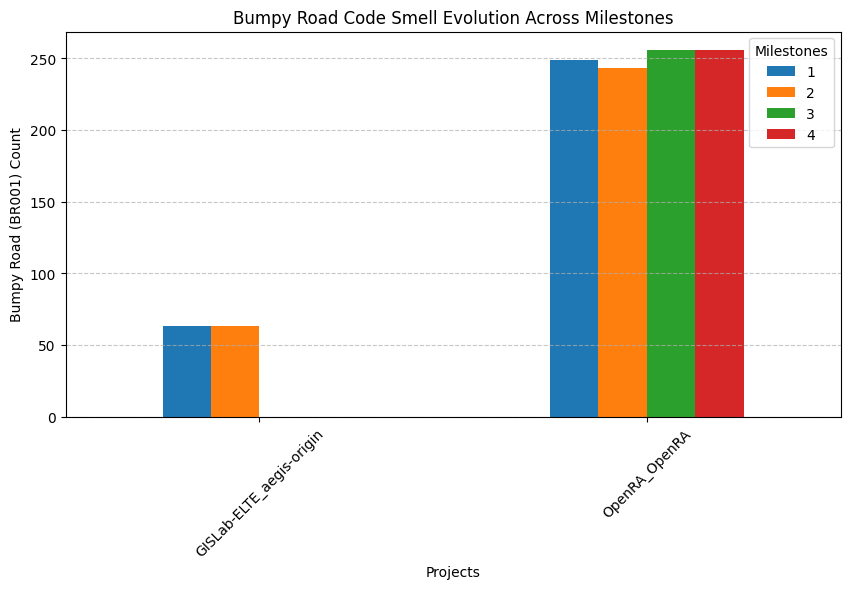

In [5]:
# Plot
plt.figure(figsize=(10, 5))
df_bumpy.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("Bumpy Road Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

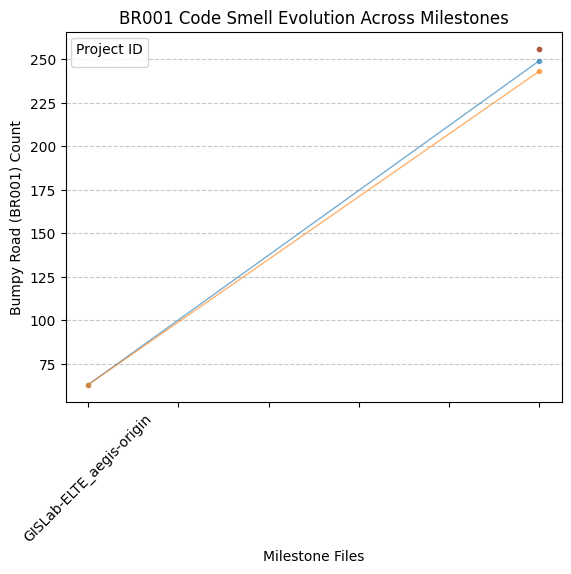

In [6]:
# Plot
plt.figure(figsize=(12, 6))
df_bumpy.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

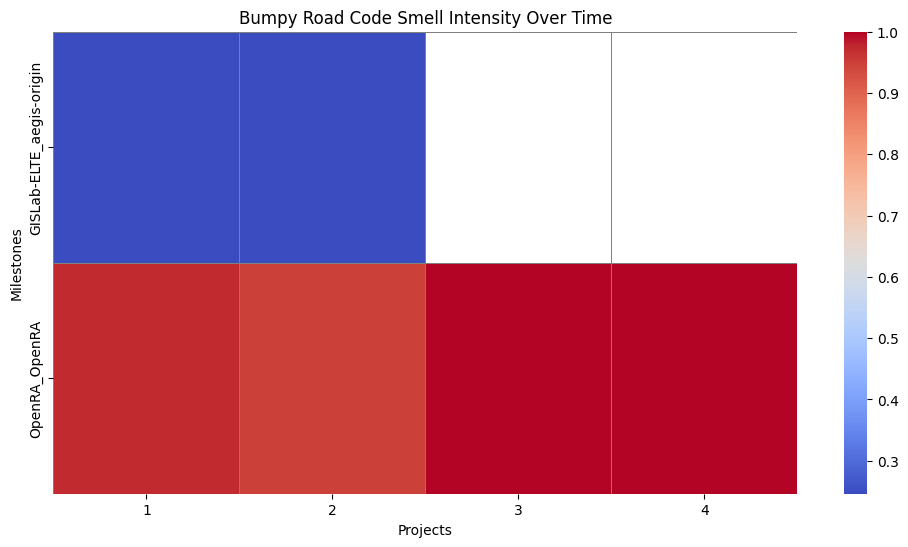

In [7]:
# Normalize values to improve visualization
df_normalized = df_bumpy / df_bumpy.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("Bumpy Road Code Smell Intensity Over Time")

# Show plot
plt.show()

### Line chart 2

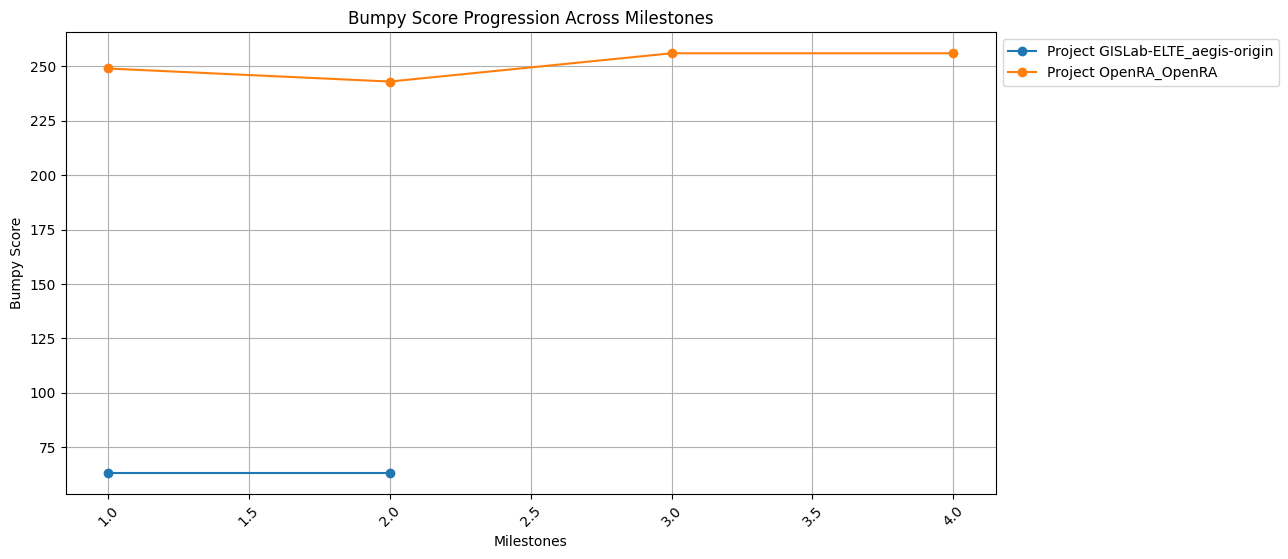

In [8]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_bumpy.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Bumpy Score")
plt.title("Bumpy Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

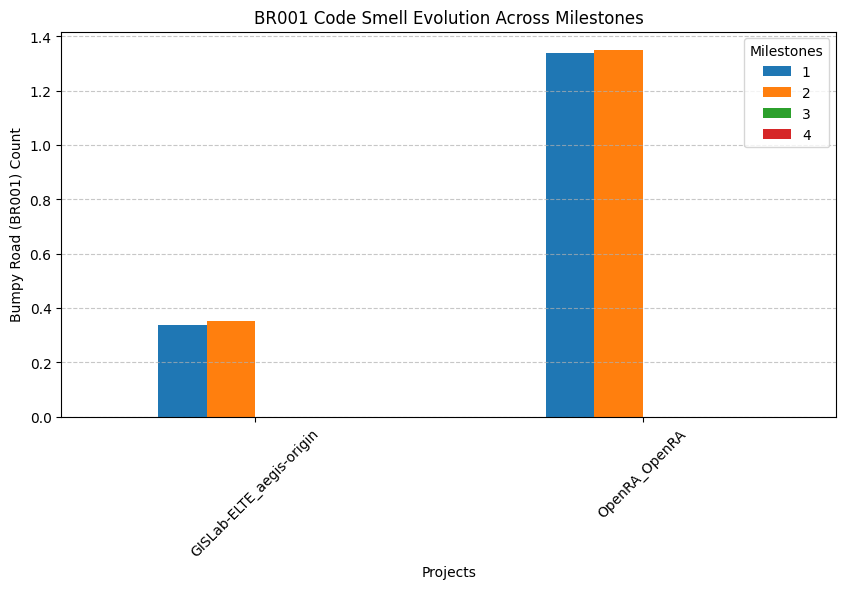

In [9]:
df_bumpy = df_bumpy / (df_bumpy.max() - df_bumpy.min())

# Plot
plt.figure(figsize=(10, 5))
df_bumpy.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Function parameter count
### Bar chart

<Figure size 1000x500 with 0 Axes>

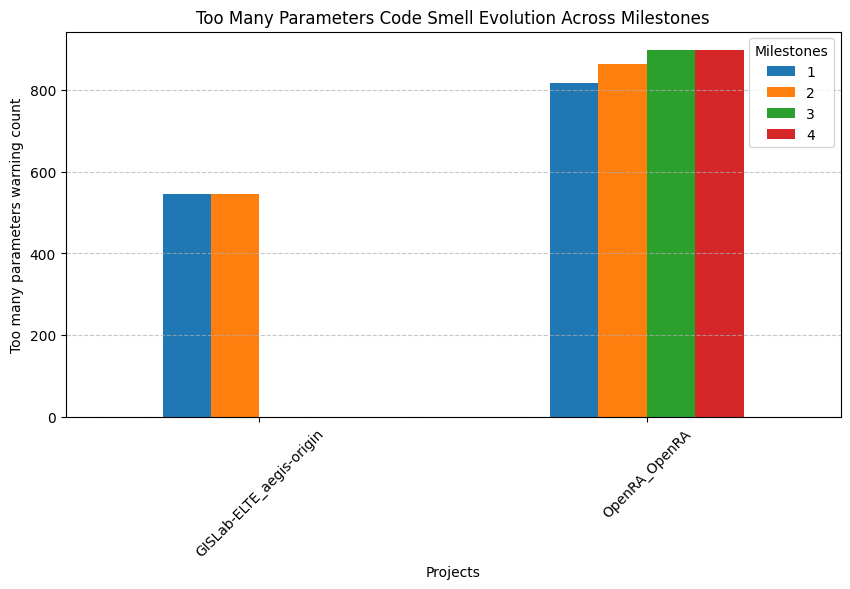

In [10]:
# Plot
plt.figure(figsize=(10, 5))
df_fpc.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Too many parameters warning count")
plt.title("Too Many Parameters Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

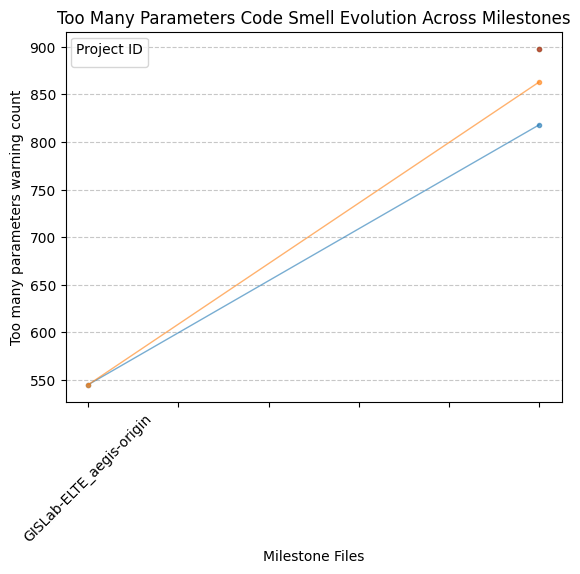

In [11]:
# Plot
plt.figure(figsize=(12, 6))
df_fpc.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Too many parameters warning count")
plt.title("Too Many Parameters Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

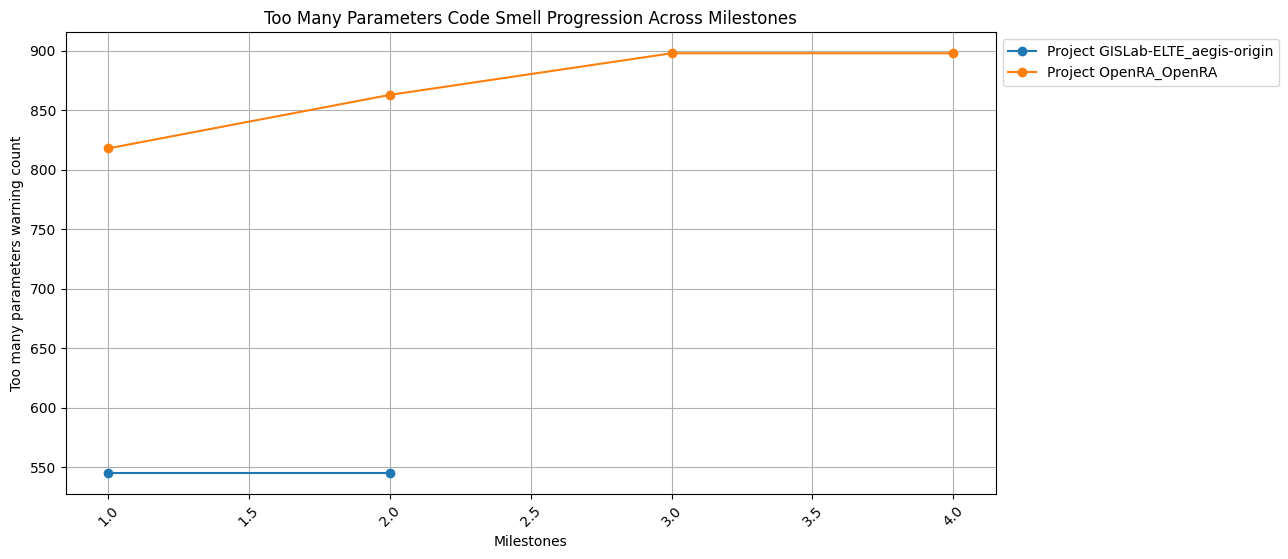

In [12]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_fpc.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Too many parameters warning count")
plt.title("Too Many Parameters Code Smell Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

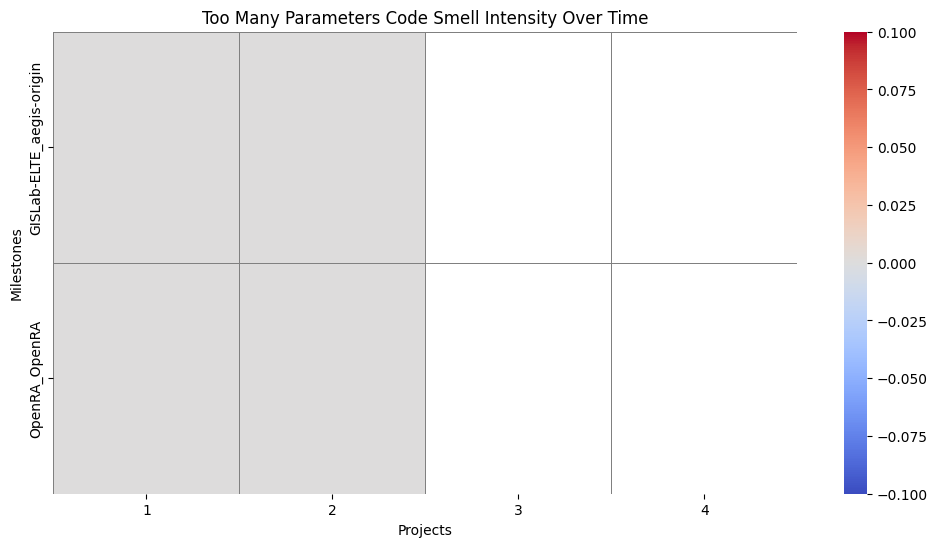

In [13]:
# Normalize values to improve visualization
df_normalized = df_bumpy / df_bumpy.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("Too Many Parameters Code Smell Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

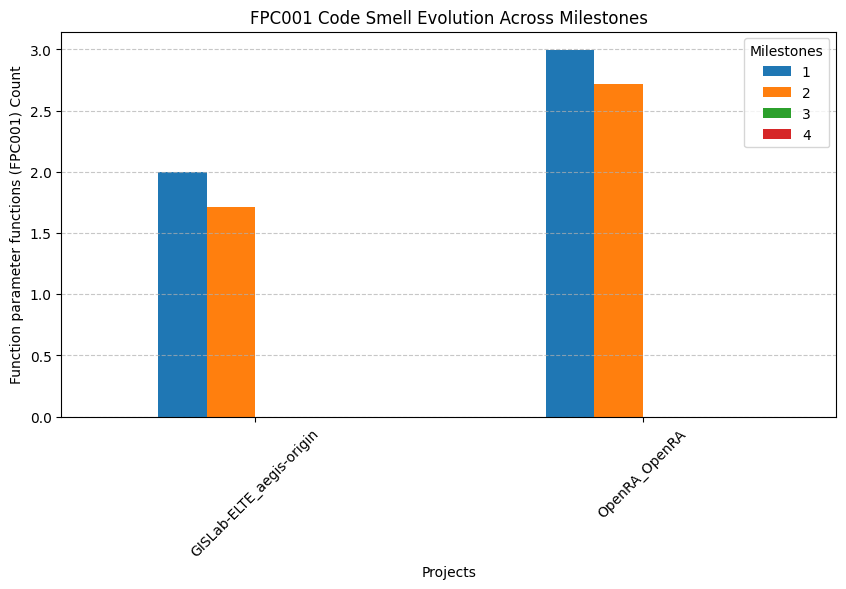

In [14]:
df_fpc = df_fpc / (df_fpc.max() - df_fpc.min())

# Plot
plt.figure(figsize=(10, 5))
df_fpc.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Function parameter functions (FPC001) Count")
plt.title("FPC001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## LCOM5

### Bar chart

<Figure size 1000x500 with 0 Axes>

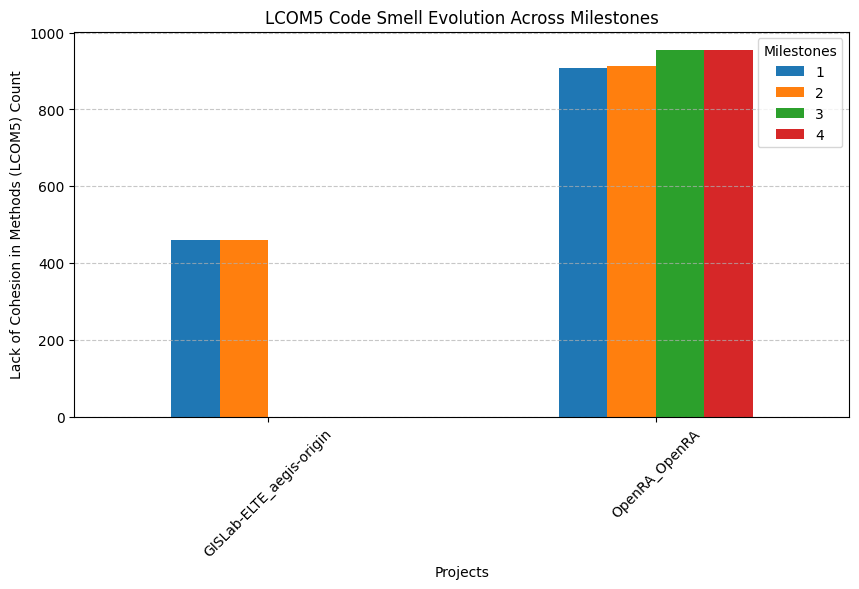

In [15]:
# Plot
plt.figure(figsize=(10, 5))
df_lcom5.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Lack of Cohesion in Methods (LCOM5) Count")
plt.title("LCOM5 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

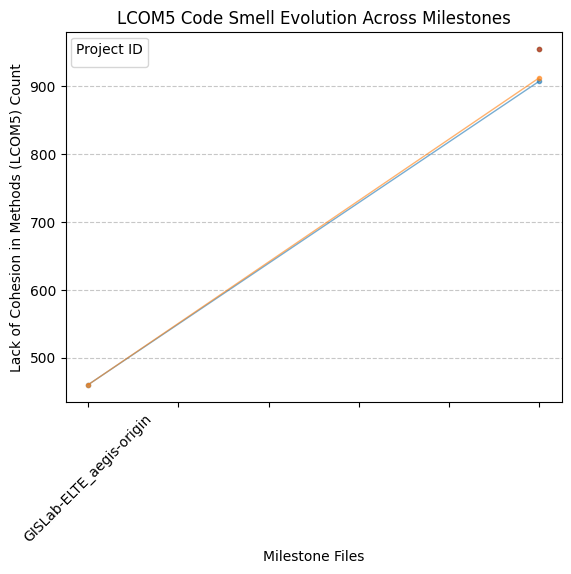

In [16]:
# Plot
plt.figure(figsize=(12, 6))
df_lcom5.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Lack of Cohesion in Methods (LCOM5) Count")
plt.title("LCOM5 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

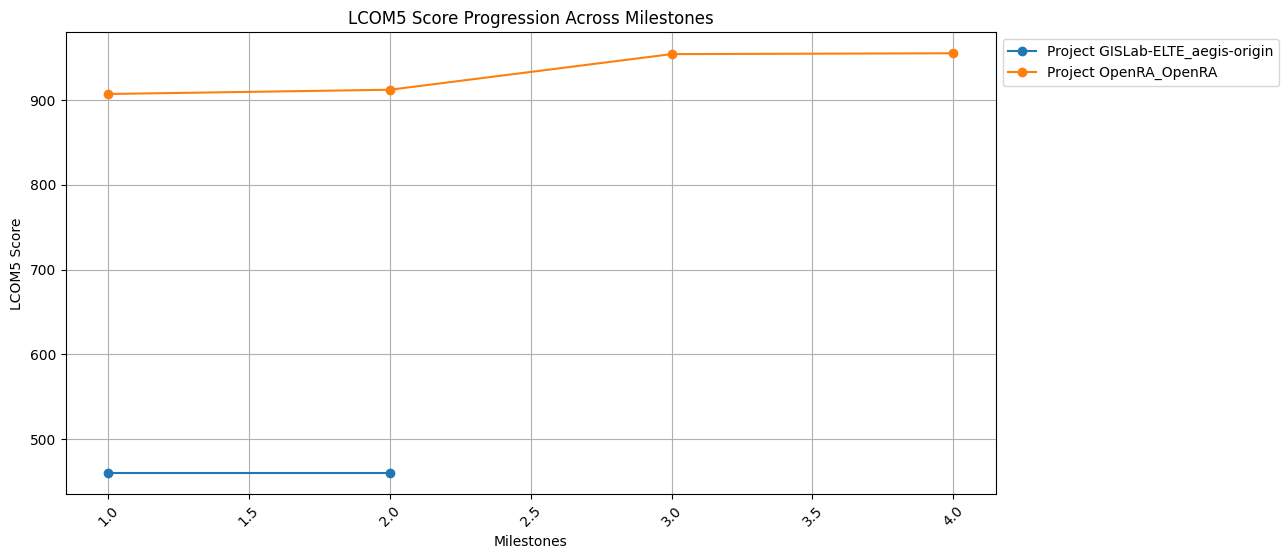

In [17]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_lcom5.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("LCOM5 Score")
plt.title("LCOM5 Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

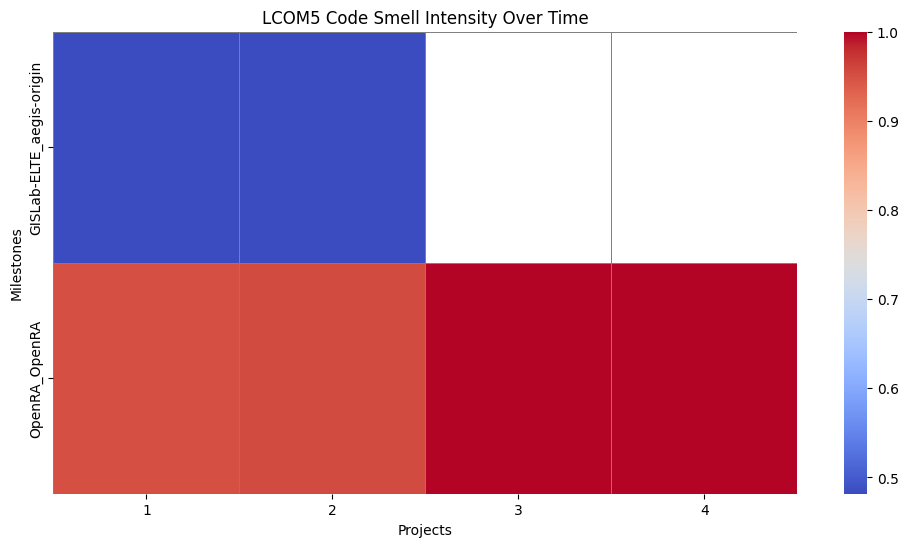

In [18]:
# Normalize values to improve visualization
df_normalized = df_lcom5 / df_lcom5.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("LCOM5 Code Smell Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

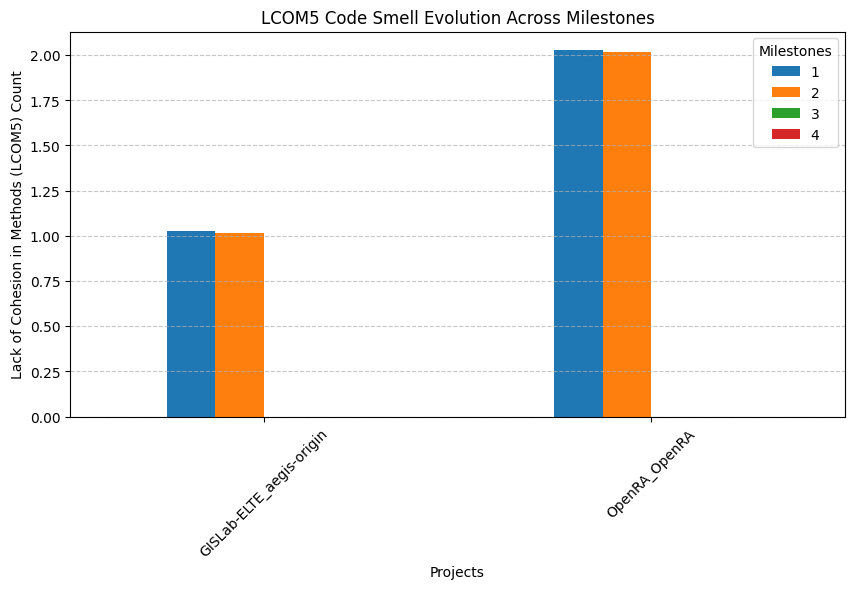

In [19]:
df_lcom5 = df_lcom5 / (df_lcom5.max() - df_lcom5.min())

# Plot
plt.figure(figsize=(10, 5))
df_lcom5.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Lack of Cohesion in Methods (LCOM5) Count")
plt.title("LCOM5 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## LCOM4

### Bar chart

<Figure size 1000x500 with 0 Axes>

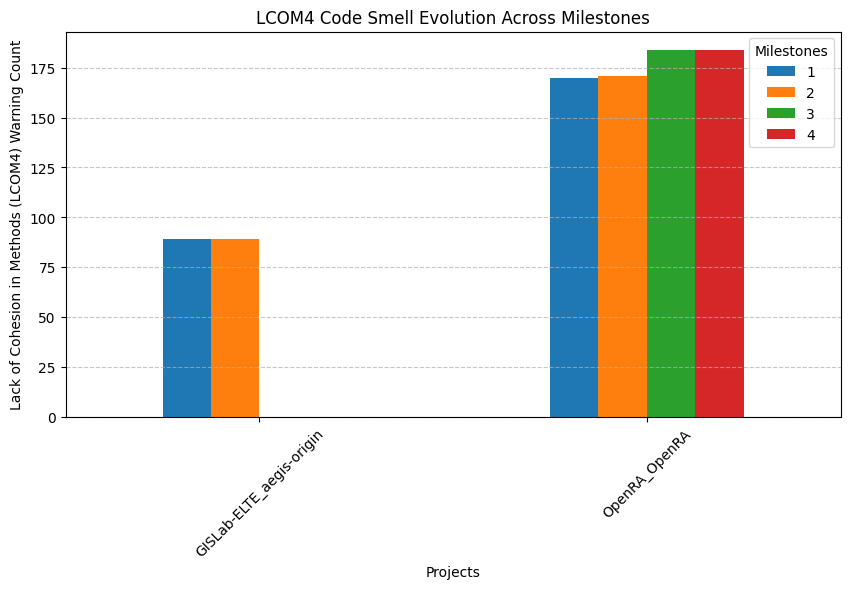

In [20]:
# Plot
plt.figure(figsize=(10, 5))
df_lcom4.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Lack of Cohesion in Methods (LCOM4) Warning Count")
plt.title("LCOM4 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

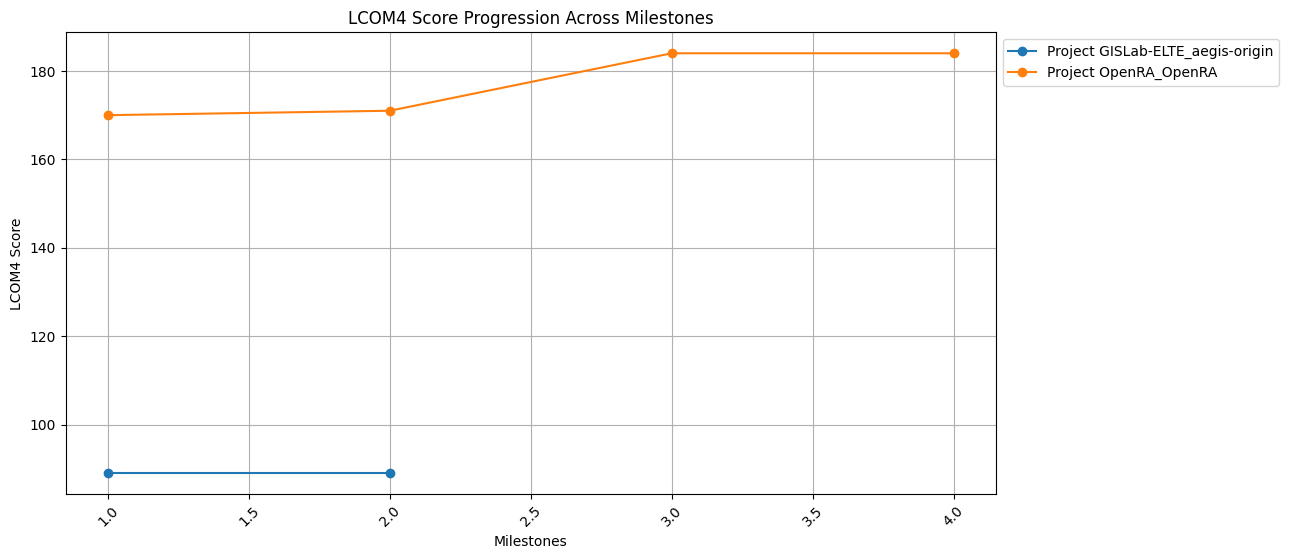

In [21]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_lcom4.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("LCOM4 Score")
plt.title("LCOM4 Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

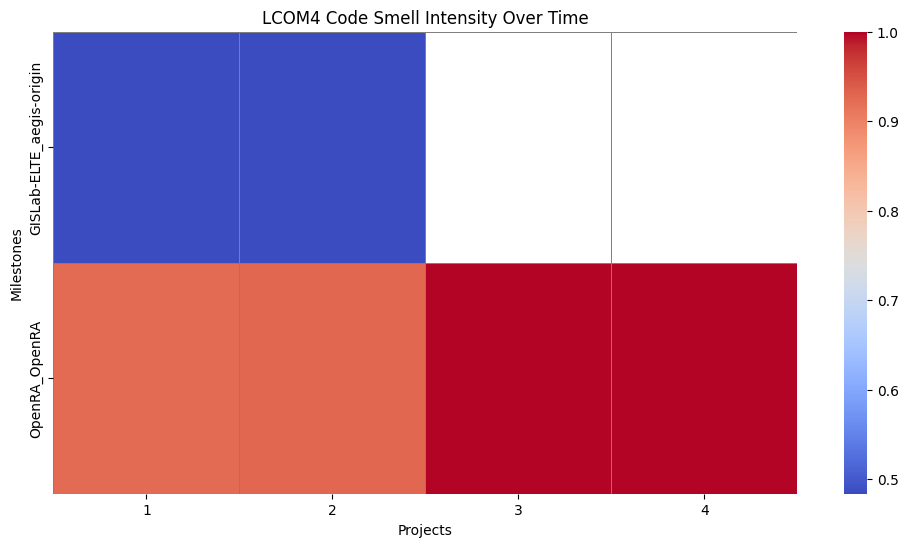

In [22]:
# Normalize values to improve visualization
df_normalized = df_lcom4 / df_lcom4.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("LCOM4 Code Smell Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

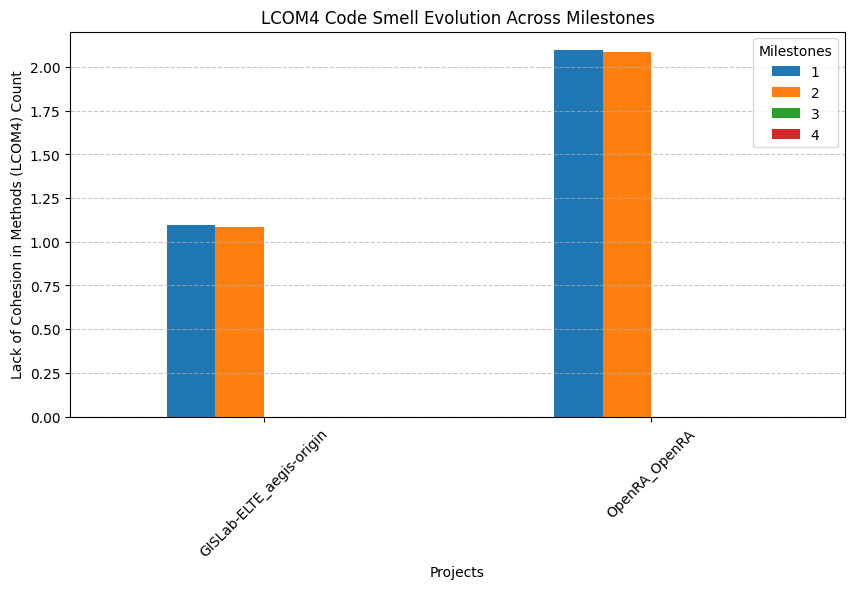

In [23]:
df_lcom4 = df_lcom4 / (df_lcom4.max() - df_lcom4.min())

# Plot
plt.figure(figsize=(10, 5))
df_lcom4.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Lack of Cohesion in Methods (LCOM4) Count")
plt.title("LCOM4 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()